## Business Case: Yulu - Hypothesis Testing

##### About Yulu
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily
commute. StarƟng off as a mission to eliminate traffic congesƟon in India, Yulu provides the safest
commute soluƟon through a user-friendly mobile app to enable shared, solo and sustainable
commuƟng.
Yulu zones are located at all the appropriate locaƟons (including metro staƟons, bus stands, office
spaces, residenƟal areas, corporate offices, etc) to make those first and last miles smooth, affordable,
and convenient!
Yulu has recently suffered considerable dips in its revenues. They have contracted a consulƟng
company to understand the factors on which the demand for these shared electric cycles depends.
Specifically, they want to understand the factors affecƟng the demand for these shared electric cycles
in the Indian market.

A) Import the dataset and do usual exploratory data analysis
steps like checking the structure & characteristics of the
dataset.

In [250]:
import numpy as np 
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [251]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [252]:
df = pd.read_csv("Yulu.csv");

In [253]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [254]:
# no of rows amd columns in dataset
print(f"# rows: {df.shape[0]} \n# columns: {df.shape[1]}")

# rows: 10886 
# columns: 12


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## 🔄 Converting Data Types of Columns
- `datetime` → `datetime`
- `season` → `category`
- `holiday` → `category`
- `workingday` → `category`
- `weather` → `category`


In [256]:
df['datetime'] = pd.to_datetime(df['datetime'])
cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
    df[col] = df[col].astype('object')

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [258]:
df.iloc[:,1:].describe(include='all')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


- There are no missing values in the dataset.  
- casual and registered attributes might have outliers because their mean and median are very far away to one another and the value of standard deviation is also high which tells us that there is high variance in the data of these attributes.



In [259]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [260]:
df.season.value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [261]:
df.weather.value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [262]:
df.workingday.value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

Try establishing a relation between the
dependent and independent variable
(Dependent “Count” & Independent:
Workingday, Weather, Season etc)

# Univariate Analysis:

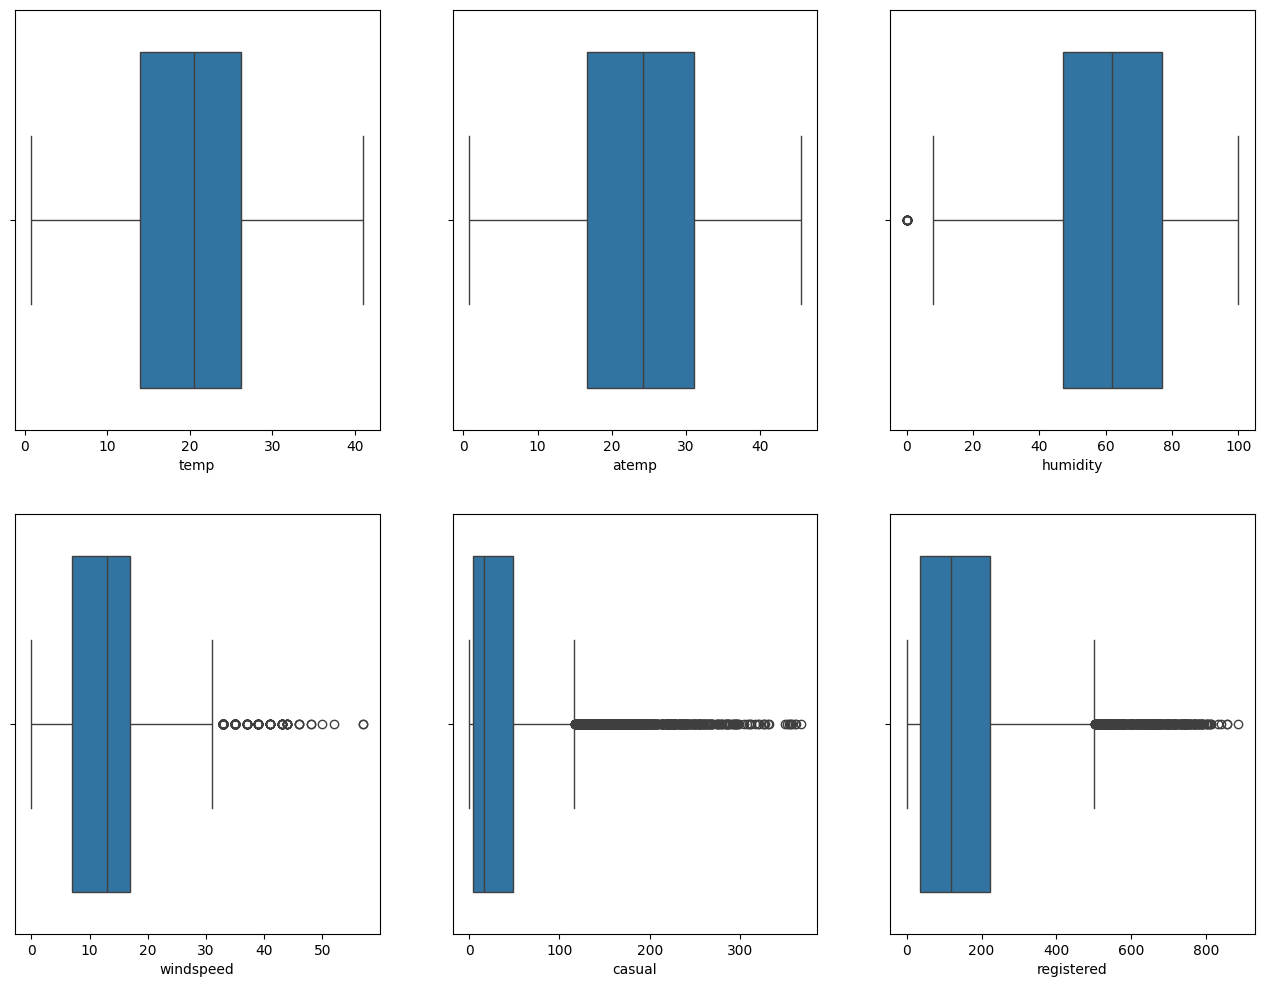

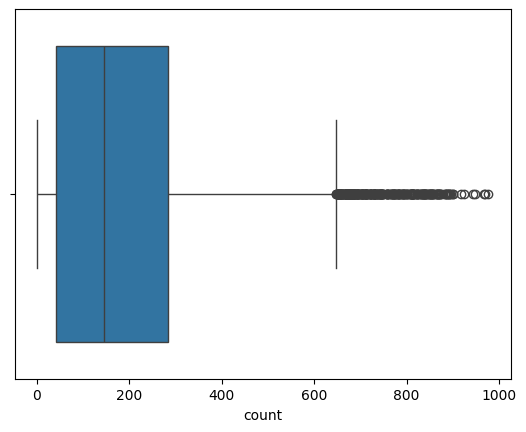

In [263]:
# plotting box plots to detect outliers in the data
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=df[num_cols[index]], ax=axis[row, col])
        index += 1
plt.show()
sns.boxplot(x=df[num_cols[-1]])
plt.show()

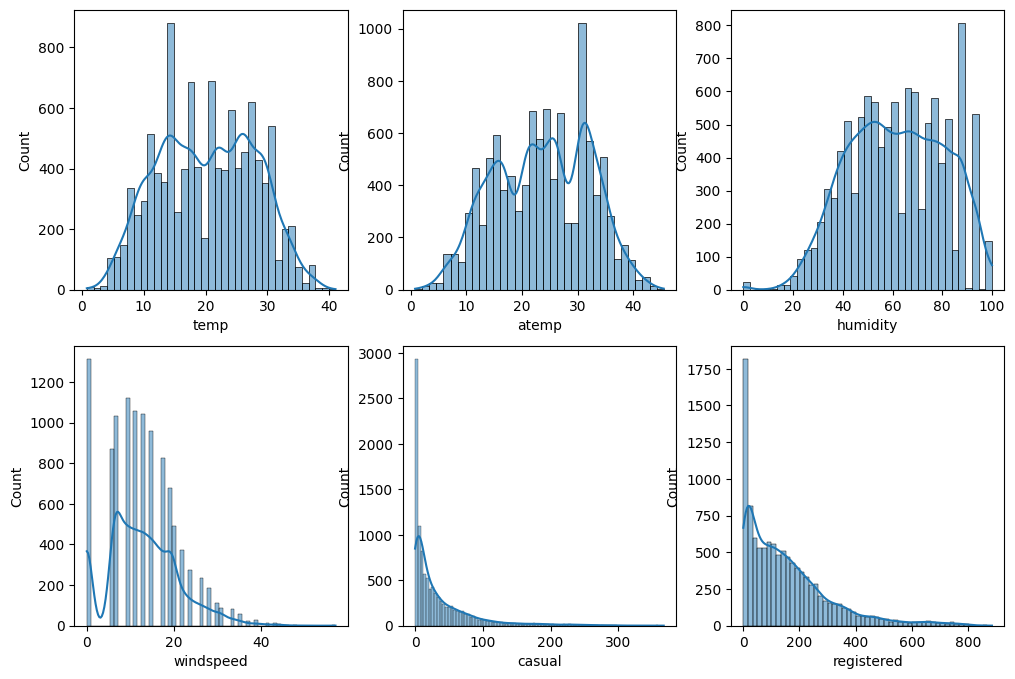

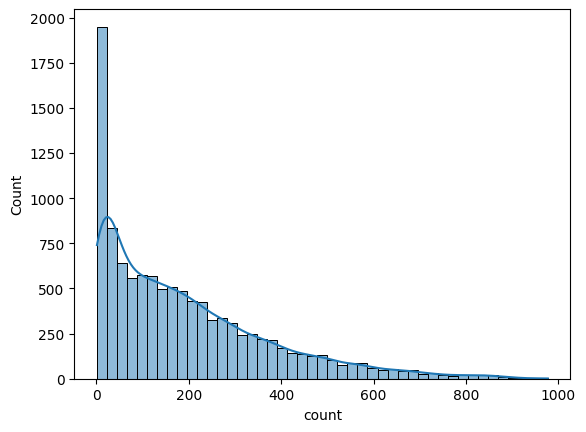

In [264]:
# understanding the distribution for numerical variables
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual',
'registered','count']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[num_cols[index]], ax=axis[row, col], kde=True)
        index += 1
plt.show()
sns.histplot(df[num_cols[-1]], kde=True)
plt.show()

<sub>• 'casual', 'registered', and 'count' somewhat look like Log Normal Distribution  
• 'temp', 'atemp', and 'humidity' appear to follow a Normal Distribution  
• 'windspeed' seems to follow a Binomial Distribution</sub>


<Axes: xlabel='weather', ylabel='count'>

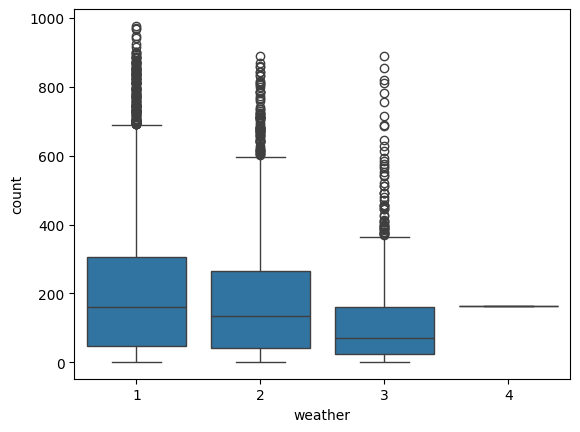

In [265]:

sns.boxplot(x='weather',y='count', data=df)

Looks like humidity, casual, registered and count have outliers in the data.

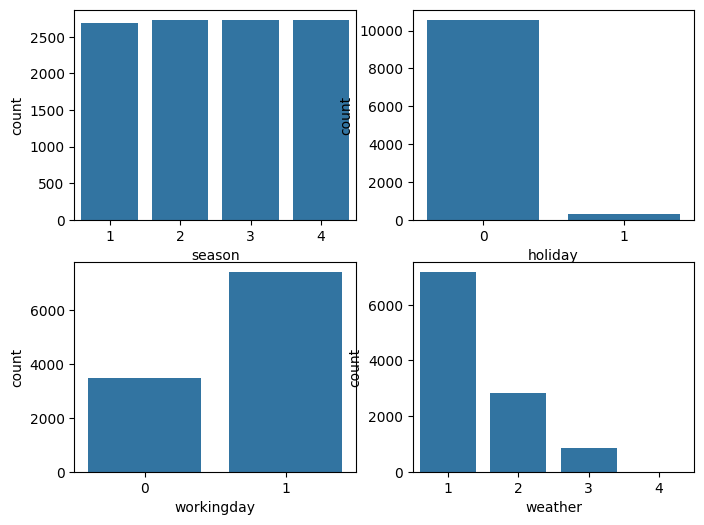

In [266]:
# countplot of each categorical column
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=df, x=cat_cols[index], ax=axis[row, col])
        index += 1
plt.show()

Data looks common as it should be like equal number of days in each season, more working
days and weather is mostly Clear, Few clouds, partly cloudy, partly cloudy.

<Axes: xlabel='workingday', ylabel='count'>

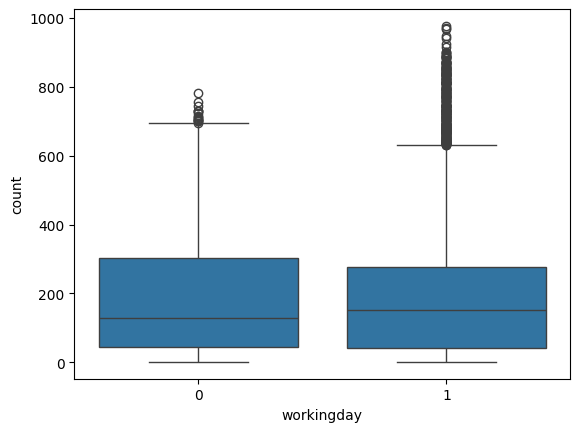

In [267]:
sns.boxplot(x='workingday',y='count', data=df)


<Axes: xlabel='weather', ylabel='count'>

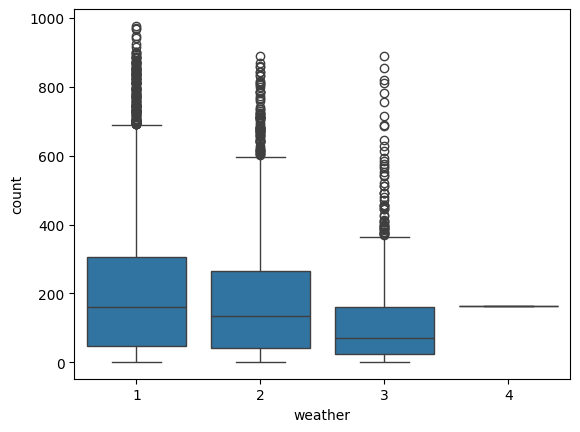

In [268]:
sns.boxplot(x='weather',y='count', data=df)


<Axes: xlabel='season', ylabel='count'>

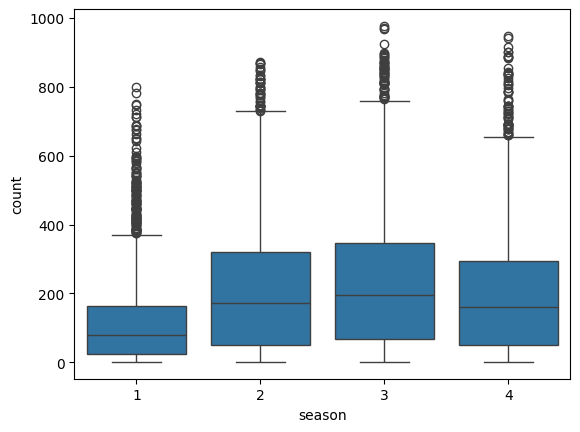

In [269]:
sns.boxplot(x='season',y='count', data=df)


<Axes: xlabel='holiday', ylabel='count'>

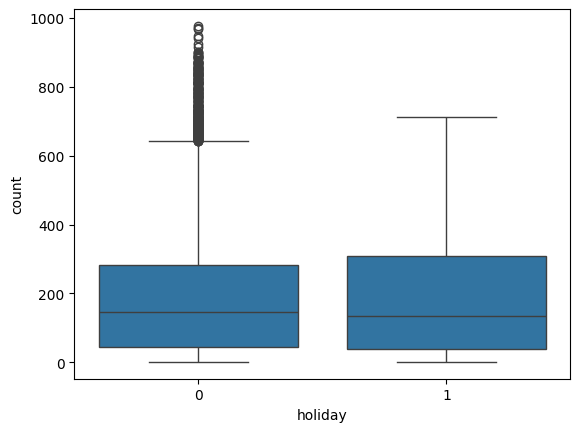

In [270]:
sns.boxplot(x='holiday',y='count', data=df)

<sub>
• In summer and fall seasons, more bikes are rented as compared to other seasons.  
<br>
• Whenever it's a holiday, more bikes are rented.  
<br>
• It is also clear from the workingday column that when the day is a holiday or weekend, slightly more bikes are rented.  
<br>
• Whenever there is rain, thunderstorm, snow, or fog, fewer bikes are rented.  
</sub>


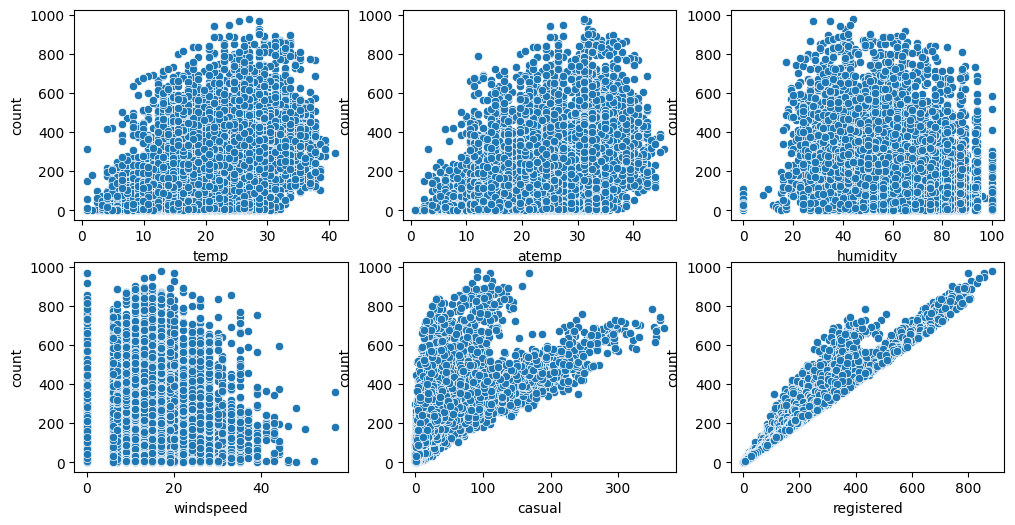

In [304]:
# plotting numerical variables againt count using scatterplot
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=num_cols[index], y='count',
        ax=axis[row, col])
        index += 1
plt.show()

<sub>
• Whenever the humidity is less than 20, number of bikes rented is very very low.  
<br>
• Whenever the temperature is less than 10, number of bikes rented is less.  
<br>
• Whenever the windspeed is greater than 35, number of bikes rented is less.  
</sub>


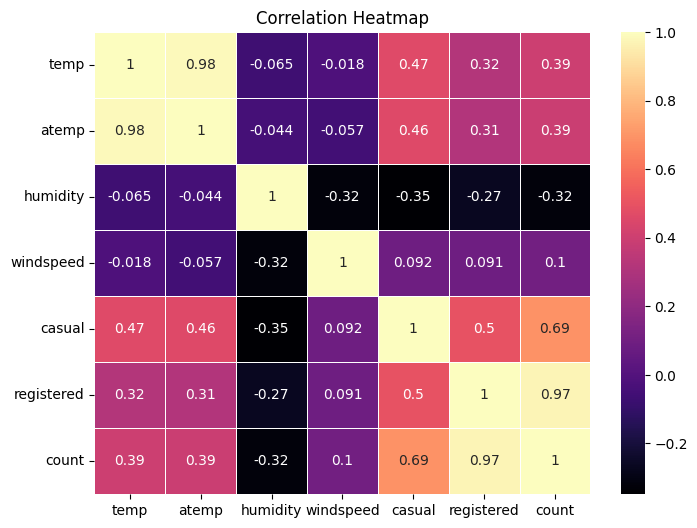

In [308]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only relevant numerical columns
numerical_features = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='magma', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


## 2: Hypothesis Testing

- **Chi-square test to check if Weather is dependent on the season**

**Null Hypothesis (H₀):** Weather is independent of the season  
**Alternate Hypothesis (H₁):** Weather is not independent of the season  
**Significance Level (α):** 0.05


In [309]:
data_table = pd.crosstab(df['season'], df['weather'])
print("Observed values:")
data_table

Observed values:


weather,0,1,2,3
season,,,,
0,1759,715,211,1
1,1801,708,224,0
2,1930,604,199,0
3,1702,807,225,0


In [271]:
df.groupby('workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


In [272]:
#ho= the count of bikes on working_day <= the count on non-working

In [273]:
#ha= the count of bikes on working_day > the count on non-working
alpha = 0.05
#t-test

In [274]:
working_day= df[df['workingday']==1]['count'].sample(3400)
non_working_day= df[df['workingday']==0]['count'].sample(3400)

In [275]:
working_day.std()

np.float64(185.0743158194698)

In [276]:
non_working_day.std()

np.float64(174.17493551749013)

In [277]:
from scipy.stats import ttest_ind

In [278]:
test_stats, p_val=ttest_ind(working_day,non_working_day, equal_var= False ,alternative='greater')

In [279]:
p_val

np.float64(0.10293429818450632)

In [280]:
p_val> alpha

np.True_

In [281]:
#insights

In [282]:
df.groupby('weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


In [283]:
#ho= the count of bikes subscribed are similar across different weather
#ha= the count of bikes subscribed are not similar across different weather
#anova
#assumptions
#a. The distribution should be normal -- qqplot, distplot, Shapiro Wilk test - ho= Dist is
#b. equal variances - describe, levene's test- ho= equal varaince


In [284]:
w1= df[df['weather']==1]['count'].sample(850)
w2= df[df['weather']==2]['count'].sample(850)
w3= df[df['weather']==3]['count'].sample(850)


C:\Users\Vishal\AppData\Local\Temp\ipykernel_5484\727255023.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(w1)


<Axes: xlabel='count', ylabel='Density'>

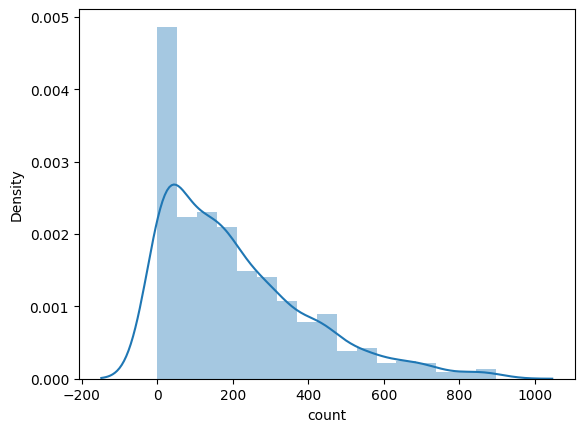

In [285]:
#normality
sns.distplot(w1)

C:\Users\Vishal\AppData\Local\Temp\ipykernel_5484\262749121.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(w2)


<Axes: xlabel='count', ylabel='Density'>

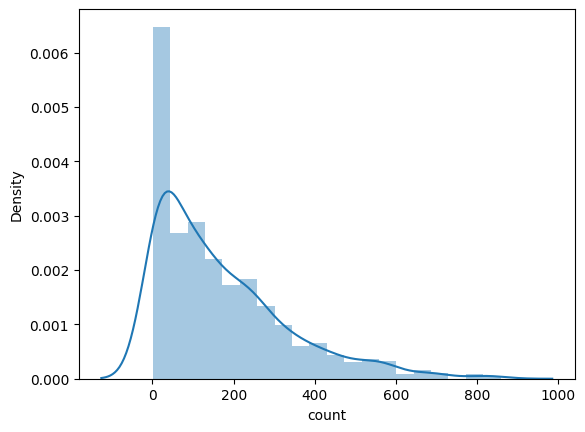

In [286]:
#normality
sns.distplot(w2)

C:\Users\Vishal\AppData\Local\Temp\ipykernel_5484\1612253951.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(w3)


<Axes: xlabel='count', ylabel='Density'>

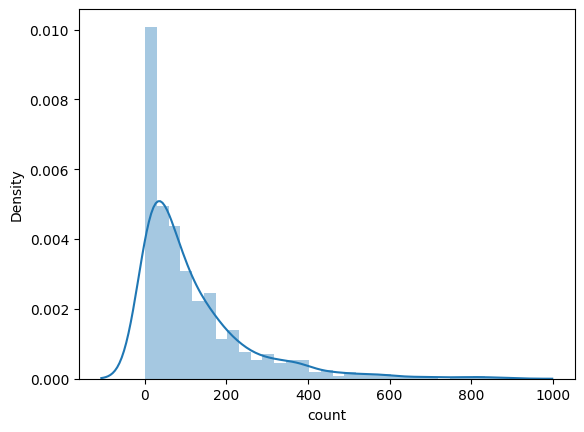

In [287]:
sns.distplot(w3)

C:\Users\Vishal\AppData\Local\Temp\ipykernel_5484\3529599385.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(w1))


<Axes: xlabel='count', ylabel='Density'>

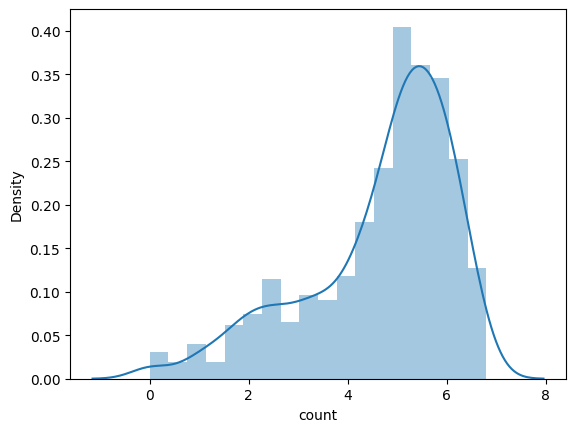

In [288]:
#to fix right bias or skewness- Log transformation
import numpy as np
sns.distplot(np.log(w1))


C:\Users\Vishal\AppData\Local\Temp\ipykernel_5484\941925657.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(w2))


<Axes: xlabel='count', ylabel='Density'>

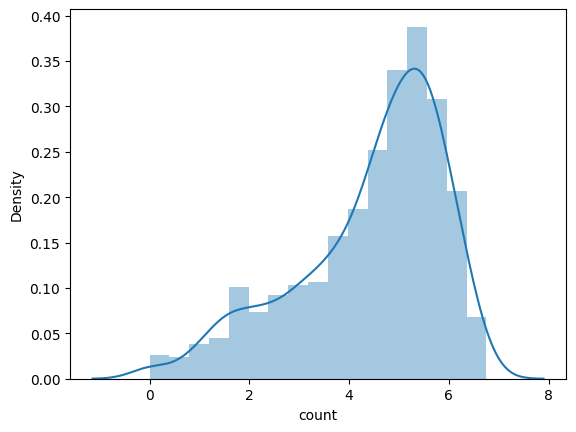

In [289]:
sns.distplot(np.log(w2))

C:\Users\Vishal\AppData\Local\Temp\ipykernel_5484\3371023734.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(w3))


<Axes: xlabel='count', ylabel='Density'>

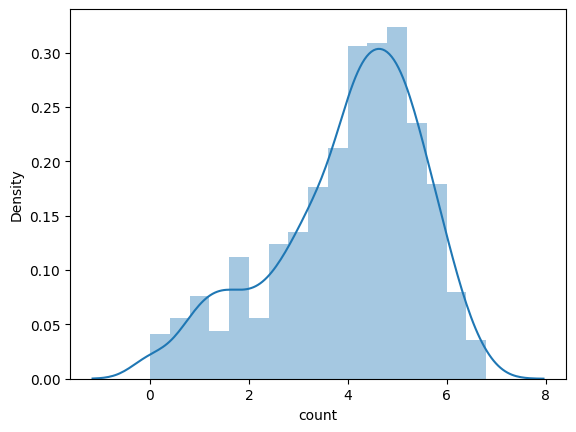

In [290]:
sns.distplot(np.log(w3))

In [291]:
#the distributions are not normal through visual analysis

In [292]:
#shapiro ho= Dist is normal
from scipy.stats import shapiro


In [293]:
t_stats, p_val = shapiro(w1)


In [294]:
p_val > alpha

np.False_

In [295]:
from scipy.stats import levene


In [296]:
t_stats, p_val = levene(w1, w2, w3)

In [297]:
p_val > alpha


np.False_

In [298]:
#variance is also different
#should we apply anova - No
#KW test -- https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-chea
#https://stats.stackexchange.com/questions/5680/can-i-trust-anova-results-for-a-non-normall

In [299]:
from scipy.stats import f_oneway
t_stats, p_val = f_oneway(w1, w2, w3)

In [300]:
p_val > alpha

np.False_

In [301]:
#weather has an affect on subscriptions of bikes